### 1. ISLR chapter 5, exercise 2 (page 197-198)



2. We will now derive the probability that a given observation is part
of a bootstrap sample. Suppose that we obtain a bootstrap sample
from a set of n observations.

##### (a) What is the probability that the first bootstrap observation is
##### not the jth observation from the original sample? Justify your answer.

1−1/n.

##### (b) What is the probability that the second bootstrap observation
##### is not the jth observation from the original sample?

Since we draw with replacement, it is the same as above. So, 1−1/n.


##### (c) Argue that the probability that the jth observation is not in the bootstrap sample is (1 − 1/n)n. 

With replacement, the probability of the jth observation is not in the bootstrap sample but the product of the probabilities, so (1−1/n)⋯(1−1/n)=(1−1/n)n, where as these probabilities are independant.



##### (d) When n = 5, what is the probability that the jth observation is in the bootstrap sample?

By pluging into the formular,
P(5th observation)=1−(1−1/5)^5=0.672.


##### (e) When n = 100, what is the probability that the jth observation

P(100th observation)=1−(1−1/100)^100=0.634.



##### (f) When n = 10, 000, what is the probability that the jth observation
##### is in the bootstrap sample?

P(10, 000th observation)=1−(1−1/10000)^10000=0.632.



##### (g) Create a plot that displays, for each integer value of n from 1 to 100, 000, the probability that the jth observation is in the  bootstrap sample. Comment on what you observe.

I observe that the plot quickly reaches an asymptote at about 0.632.

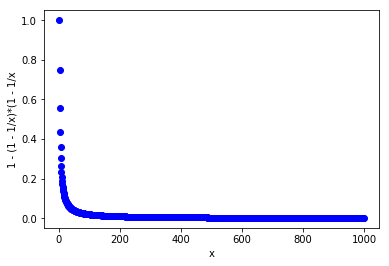

In [2]:
import matplotlib.pyplot as plt
for x in range (1,100000):
    x = float(x)
    y = float(1 - (1 - 1/x)*(1 - 1/x))
    plt.plot(x, y, 'bo')
    plt.xlabel('x')
    plt.ylabel('1 - (1 - 1/x)*(1 - 1/x')

#### (h) We will now investigate numerically the probability that a bootstrap sample of size n=100 contains the jth observation. Here j=4. We repeatedly create bootstrap samples, and each time we record whether or not the fourth observation is contained in the bootstrap sample.

In [60]:
import pandas as pd
import numpy as np
store = []
for x in range (10000):  
    s = pd.Series(np.random.randn(100))
    temp = s.sample(n=4,replace=True)
    store.append(Tru) if sum(temp)>0 else store.append(0.0)

print np.mean(store)

#              store[x] = sum(temp)>0 
   
#     store[i]=sum(s.df.sample(100, replace = true)==4)>0 

0.4909


### 2. ISLR chapter 4, exercise 6
a)

p̂ (X)= e ^(−6+0.05X1+X2) / (1 + e ^ (−6+0.05X1+X2) ) = 0.3775.

so the prob for a student who studies for 40 hours and has an undergrad GPA of 3.5 gets an A in the class is 0.3775

b)
So we set p̂ (X) to be 0.5

e ^ (−6+0.05X1+3.5) / (1 + e ^ (−6+0.05X1+X2) ) = 0.5,

So, e−6+0.05X1+3.5=1.

Therefore, we get X1=50

### 3. ISLR chapter 4, exercise 7

when X = 4, by plugging value into the equation, we have

p1(4)=  0.8e−(1/72)(4−10)20.8e−(1/72)(4−10)2+0.2e−(1/72)(4−0)2=0.752;

so the probability that a company will issue a dividend this year given that its percentage return was X=4 last year is 0.752.


### 4 coding part
Most neurons in the brain develop before you are born and remain with you throughout your life. A
small but important part of the brain called the dentate gyrus of the hippocampus continues to create
new neurons past birth and into adulthood. These “adult newborn neurons” are thought to be important
for creating distinct memories of similar events. In this problem, we will use a recently published data
set containing gene expression measurements from single neurons to classify cells by their age. The
study by Habib et al. is titled “ Div-Seq: Single-nucleus RNA-Seq reveals dynamics of rare adult
newborn neurons ”

In [210]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

#read data
df = pd.read_csv("/Users/xuzhaokai/Desktop/109 HW3 due 10:23/hw3_divseq_data.csv")
data = df.values # pd dataFrate to matrix

print data.shape
print data

(817, 3)
[[ 9.95  6.69  1.  ]
 [10.54  8.53  1.  ]
 [ 6.58  8.74  1.  ]
 ...
 [ 3.98  6.51  0.  ]
 [ 4.9   6.16  0.  ]
 [ 3.38  4.95  0.  ]]


In [6]:
Lars2 = data[:,0]
Malat1 = data[:,1]
mature = data[:,2]

#### a. Create a box plot showing the expression level of Lars2 for immature and mature neurons. 
#### Do the same for Malat1 .

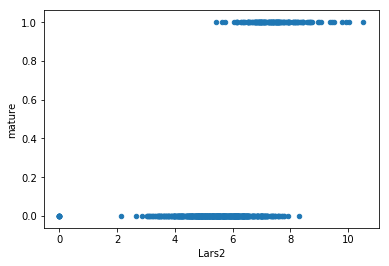

In [7]:
df.plot.scatter("Lars2","mature")

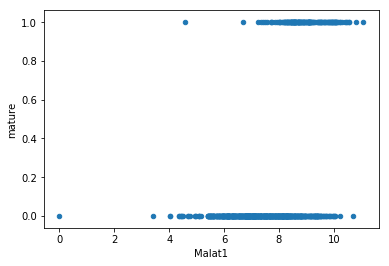

In [8]:
df.plot.scatter("Malat1","mature")

#### b. Based on these plots, comment on whether you expect that 
#### a classifier could perfectly predict a neuron’s maturity based on Lars2 expression alone.

No because there are still a range of overlap between label 0 and label 1
for Lars2 from 5 to 8, the classifier can not prefectly predict what the label is 
only based on Lars2

#### c. Fit a logistic regression to predict mature based on Lars2 alone; do not use Malat1 . 

In [67]:
import numpy as np
import statsmodels.api as sm # statsmodels library
# import statsmodels.formula.api as smf  
# same as import statsmodels.api as sm BUT no need to add const

#add const to gain intercept
Lars2_const = sm.add_constant(df["Lars2"])
print(Lars2_const.head())

model = sm.Logit(mature,Lars2_const) 
results = model.fit()
print(results.summary2())  

   const  Lars2
0    1.0   9.95
1    1.0  10.54
2    1.0   6.58
3    1.0   7.49
4    1.0   7.42
Optimization terminated successfully.
         Current function value: 0.235975
         Iterations 9
                        Results: Logit
Model:              Logit            No. Iterations:   9.0000  
Dependent Variable: y                Pseudo R-squared: 0.531   
Date:               2018-10-23 10:14 AIC:              389.5837
No. Observations:   817              BIC:              398.9950
Df Model:           1                Log-Likelihood:   -192.79 
Df Residuals:       815              LL-Null:          -411.04 
Converged:          1.0000           Scale:            1.0000  
----------------------------------------------------------------
         Coef.    Std.Err.     z      P>|z|    [0.025    0.975] 
----------------------------------------------------------------
const   -17.9775    1.4318  -12.5561  0.0000  -20.7837  -15.1713
Lars2     2.5422    0.2085   12.1914  0.0000    2.1335 

In [68]:
print(results.pvalues)

const    3.679364e-36
Lars2    3.455778e-34
dtype: float64


What is the p-value for coefficient (slope) of Lars2 ?

3.455778e-34

What can you infer, i.e. what conclusion can you draw?

since the p - value( the prob that we would observe the data if H0 were true ) is small,
p<0.05, we can draw the conclustion that there is a very strong positive relation between Lars2 and mature


#### d. Using your model, calculate the predicted probability that each neuron is mature, i.e.
#### p = P(mature | Lars2) . Make a plot showing Lars2 on the x-axis vs. p on the y-axis. 
#### The plot should have a sigmoid shape. 


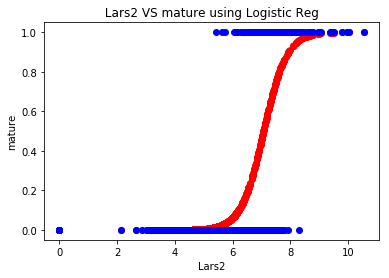

In [198]:
import numpy as np
import statsmodels.api as sm 
import matplotlib.pyplot as plt

mature_predict = results.predict(Lars2_const)

plt.plot(Lars2, mature_predict, 'ro')
plt.plot(Lars2, mature, 'bo')
plt.xlabel("Lars2")
plt.ylabel("mature")
plt.title (" Lars2 VS mature using Logistic Reg ")

#### Based on this plot, what prediction would you make for the maturity of a cell with Lars2 = 8?

when Lars2 = 8, we predict the mature to be 1, which means true 

#### e. Use a Bayesian classification criterion to predict, for each cell, whether or not it is mature. 

In [199]:
# Recall that a Bayesian classifier chooses the most likely category; in this case, that means that it
# should predict “mature” whenever . Using these predictions, P(mature | Lars2) > 0.5 compute the
# sensitivity of your classifier, i.e. the fraction of mature cells that are correctly classified as
# mature.

predict_label_list = []

for item in mature_predict:
    if item < 0.5:
        predict_label_list.append(0)
    else:
        predict_label_list.append(1)

mature_counter=0
mature_size = 0 
size = len(predict_label_list)
for i in range(size):
    if mature[i] == 1:
        mature_size+=1
    if predict_label_list[i] == mature[i] and  mature[i] ==1:
        mature_counter += 1
        
print "mature_size: ", mature_size
print "mature that are correctly predicted ", mature_counter
print " the fraction of mature cells that are correctly classified as mature is"
print float(mature_counter)/float(mature_size) *100,"%"

mature_size:  165
mature that are correctly predicted  108
 the fraction of mature cells that are correctly classified as mature is
65.4545454545 %


#### f. Compute the specificity of your classifier, 

In [200]:
#i.e. the fraction of immature cells that are correctly classified as immature.

immature_counter=0
immature_size = 0 
size = len(predict_label_list)
for i in range(size):
    if mature[i] == 0:
        immature_size+=1
    if predict_label_list[i] == mature[i] and  mature[i] ==0:
        immature_counter += 1
        
print "immature_size: ", immature_size
print "immature that are correctly predicted ", immature_counter

print " the fraction of immature cells that are correctly classified as immature is"
print float(immature_counter)/float(immature_size) *100,"%"



immature_size:  652
immature that are correctly predicted  616
 the fraction of immature cells that are correctly classified as immature is
94.4785276074 %


#### g Try predicting the maturity level for each cell with a threshold of 20%, 

In [201]:
# i.e. predict mature whenever P(mature | Lars2) > 0.2 . What are the sensitivity and specificity? 

predict_label_list = []

for item in mature_predict:
    if item < 0.2:
        predict_label_list.append(0)
    else:
        predict_label_list.append(1)

mature_counter=0
mature_size = 0 
size = len(predict_label_list)
for i in range(size):
    if mature[i] == 1:
        mature_size+=1
    if predict_label_list[i] == mature[i] and  mature[i] ==1:
        mature_counter += 1
        
print "mature_size: ", mature_size
print "mature that are correctly predicted ", mature_counter
print " sensitivity == the fraction of mature cells that are correctly classified as mature is"
print float(mature_counter)/float(mature_size) *100,"%"

immature_counter=0
immature_size = 0 
size = len(predict_label_list)
for i in range(size):
    if mature[i] == 0:
        immature_size+=1
    if predict_label_list[i] == mature[i] and  mature[i] ==0:
        immature_counter += 1
        
print "\n\nimmature_size: ", immature_size
print "immature that are correctly predicted ", immature_counter

print " specificity == the fraction of immature cells that are correctly classified as immature is"
print float(immature_counter)/float(immature_size) *100,"%"

mature_size:  165
mature that are correctly predicted  150
 sensitivity == the fraction of mature cells that are correctly classified as mature is
90.9090909091 %


immature_size:  652
immature that are correctly predicted  566
 specificity == the fraction of immature cells that are correctly classified as immature is
86.8098159509 %


#### g. Explain why the sensitivity is increased, while the specificity is decreased. 

By observing the previously printed diagram. The sensitivity is increased, while the specificity is decreased 
is mainly a result of the distribution of the data.

if we set the threshold to be 0.5,
then a huge number of the mature data are misclassified to be immature,

while the immature data are mostly predicted correctly.
This results in a low sensitivity and a high specificity


And if we set the threshold to be 0.2
then the theshold is moving a bit left, so that less mature data are misclassified,

while a little bit more immature data  are misclassified.
This resulte in a much higher sensitivity and a bit lower specificity


From this experiment, we notice that there is a trade-off while selecting the threshold 
Neither too large nor too small will not be good for the overall prediction.

#### In what circumstance might you prefer to use this classification threshold (20%) 
#### instead of the Bayesian threshold (50%)?

When the distribution of matual data is mainly located on the right of threshold 20%
and the distribution of immatual data is mainly located on the left of the threshold 20%,
we prefer to have a threshold(20%) that will leads to a higher sensitivity and specificity


#### h. Now we will incorporate data from both genes to try to improve our prediction.

ValueError: x and y must have same first dimension, but have shapes (165,) and (652,)

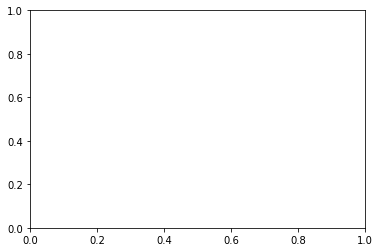

In [221]:
#  First, make a scatter plot showing Lars2 expression (x-axis) vs. Malat1 expression (y-axis). 
# Use a different color and/or plot symbol for cells that are immature and mature. 
# Make sure to label the axes of the plot and include a legend explaining 
# which color/symbol corresponds to which condition.

import matplotlib.pyplot as plt
import numpy as np

mature_list = []
immature_list = []

for item in data:
    if item[2] == 1:
        mature_list.append(item)
    else:
        immature_list.append(item)

mature_list = np.array(mature_list)
immature_list = np.array(immature_list)

plt.plot(mature_list[:,0], immature_list[:,1], 'o', color='blue');
plt.plot(mature_list[:,0], immature_list[:,1], 'o', color='red');
plt.xlabel("Malat1")
plt.ylabel("mature")
plt.title (" Malat1 VS mature using Logistic Reg ")


In [203]:
# i. Fit a logistic regression using both Lars2 and Malat1 as predictors. Print the regression
# summary table showing the coefficients, SE, t-statistic and p-value for each term. 
import numpy as np
import statsmodels.api as sm # statsmodels library

#add const to gain intercept
newdata = data[:,0:2]
newdata = sm.add_constant(newdata)

model2 = sm.Logit(mature,newdata) 
result2 = model2.fit()
print ("Notice that here x1 represents Lars2, and x2 represents Malat1, const is the intercept")
print(result2.summary2())  

Optimization terminated successfully.
         Current function value: 0.196827
         Iterations 9
Notice that here x1 represents Lars2, and x2 represents Malat1, const is the intercept
                        Results: Logit
Model:              Logit            No. Iterations:   9.0000  
Dependent Variable: y                Pseudo R-squared: 0.609   
Date:               2018-10-23 21:50 AIC:              327.6150
No. Observations:   817              BIC:              341.7320
Df Model:           2                Log-Likelihood:   -160.81 
Df Residuals:       814              LL-Null:          -411.04 
Converged:          1.0000           Scale:            1.0000  
----------------------------------------------------------------
         Coef.    Std.Err.     z      P>|z|    [0.025    0.975] 
----------------------------------------------------------------
const   -25.5697    2.1775  -11.7428  0.0000  -29.8375  -21.3019
x1        2.3119    0.2233   10.3544  0.0000    1.8743    2.7495

#### Which predictors have a significant effect?

Apparently Lars2 has a more significant effect because its coef is larger than the coef of Malat1.


#### j. Use your new model to predict whether each neuron is mature, using a Bayesian decision threshold,

In [204]:
# i.e. P(mature | Malat1, Lars2) > 0.5 . What are the sensitivity and specificity for this
# new prediction? 


new_mature_predict = result2.predict(newdata)

new_predict_label_list = []

for item in new_mature_predict:
    if item < 0.5:
        new_predict_label_list.append(0)
    else:
        new_predict_label_list.append(1)

mature_counter=0
mature_size = 0 
size = len(new_predict_label_list)
for i in range(size):
    if mature[i] == 1:
        mature_size+=1
    if new_predict_label_list[i] == mature[i] and  mature[i] ==1:
        mature_counter += 1
        
print "mature_size: ", mature_size
print "mature that is correctly predicted ", mature_counter
print " sensitivity == the fraction of mature cells that are correctly classified as mature is"
print float(mature_counter)/float(mature_size) *100,"%"

immature_counter=0
immature_size = 0 
size = len(new_predict_label_list)
for i in range(size):
    if mature[i] == 0:
        immature_size+=1
    if new_predict_label_list[i] == mature[i] and mature[i] ==0:
        immature_counter += 1
        
print "\n\nimmature_size: ", immature_size
print "immature that is correctly predicted ", immature_counter

print " specificity == the fraction of immature cells that are correctly classified as immature is"
print float(immature_counter)/float(immature_size) *100,"%"


mature_size:  165
mature that is correctly predicted  120
 sensitivity == the fraction of mature cells that are correctly classified as mature is
72.7272727273 %


immature_size:  652
immature that is correctly predicted  618
 specificity == the fraction of immature cells that are correctly classified as immature is
94.7852760736 %


#### Compare these values to the sensitivity and specificity you calculated in part (e)
 
In part e, we obtain the 
sensitivity == 65.4545454545 %
and 
specificity == 94.4785276074 %


Now with two factors to predict, we get
sensitivity == 72.7272727273 %
and 
specificity == 94.7852760736 %

Happily, we improve the specificity slightly and we make a huge improvement on sensitivity.
So we can conclude that in most case, build a model with more than one factor to predict should 
give a better prediction.
